# Multi-Class Prediction Obesity Risk - First Notebook

This notebook will try to provide step-by-step model building process of Classification Model using multi-class prediction obesity risk initially published in Kagle Competition you can access [here](https://www.kaggle.com/competitions/playground-series-s4e2)


In [65]:
# import some libraries, we may import some others later

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

### Load and Inspect Data

About the data: 

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

In [66]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### Inspect Outlier or Missing Data

In [67]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Inspect if there is any strage values across columns despite no null value detected (can be outlier or missing values represented by specific strings)

"Gender" column 

In [68]:
print(train.Gender.value_counts())
print(test.Gender.value_counts())

Gender
Female    10422
Male      10336
Name: count, dtype: int64
Gender
Female    6965
Male      6875
Name: count, dtype: int64


#### Plotting numerical into boxplot

Is done to assess the spread (for potential outlier)

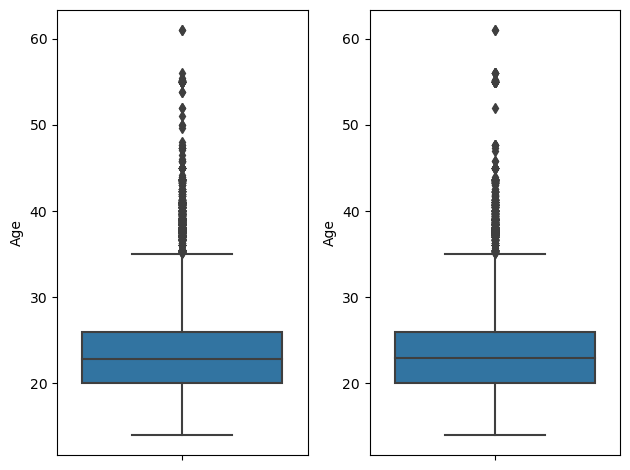

In [69]:
fig, ax = plt.subplots(1,2)

# we do boxplot for both train and test set

sns.boxplot(train, y='Age', ax=ax[0])
sns.boxplot(test, y='Age', ax=ax[1])

plt.tight_layout()

plt.show()

Potential outlier detected, so many datapoints seem far outside interquartile range, we might want to return to it later

Now we might want to assess other columns such as 'Height' and 'Weight'

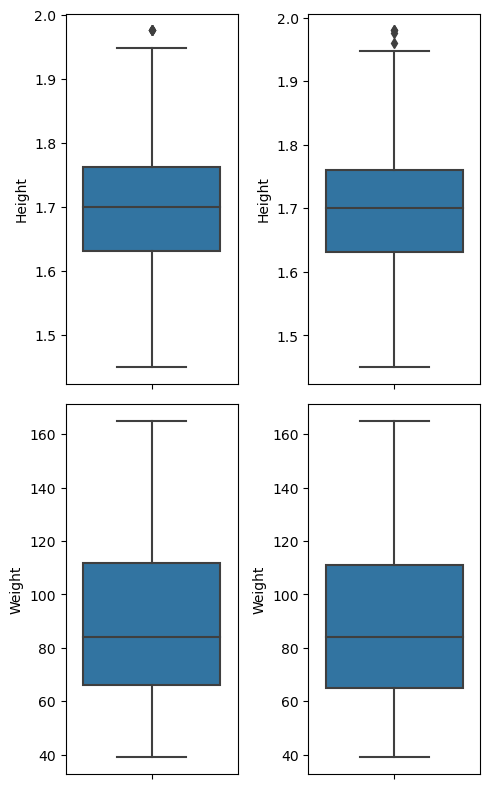

In [70]:
fig, ax = plt.subplots(2,2, figsize=(5,8))

sns.boxplot(train, y='Height', ax=ax[0][0])
sns.boxplot(test, y='Height', ax=ax[0][1])
sns.boxplot(train, y='Weight', ax=ax[1][0])
sns.boxplot(test, y='Weight', ax=ax[1][1])

plt.tight_layout()

plt.show()

Seems fine. We carry on. Next column is 'FCVC'. Unfortunately we don't have a clue what this column might represent.

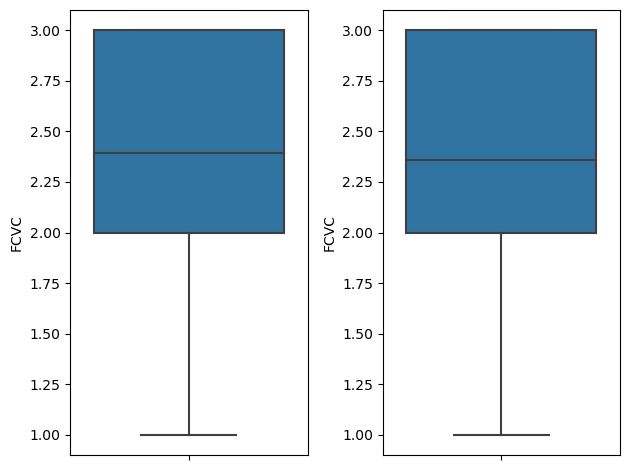

In [71]:
fig, ax = plt.subplots(1,2)

sns.boxplot(train, y='FCVC', ax=ax[0])
sns.boxplot(test, y='FCVC', ax=ax[1])

plt.tight_layout()

plt.show()

Again seems fine. We move. Next is 'NCP'

c:\Users\Zak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


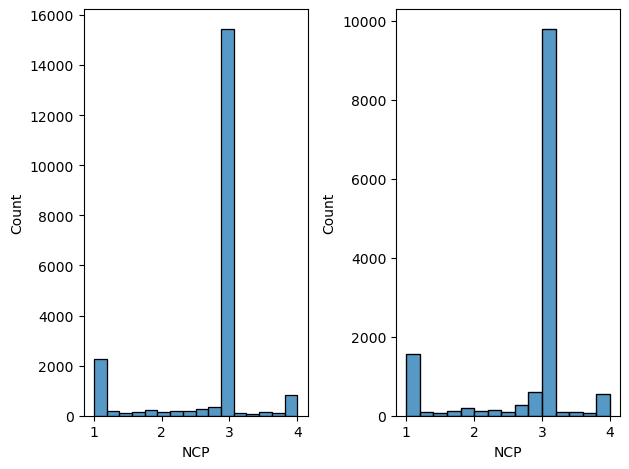

In [72]:
fig, ax = plt.subplots(1,2)

sns.histplot(train['NCP'], ax=ax[0])
sns.histplot(test['NCP'], ax=ax[1])

plt.tight_layout()

plt.show()

↑ warning statement indicate inf values?. Is there any infinite values contained in this column?. Let's check below 

In [73]:
print(np.any(np.isinf(train['NCP'])))
print(np.any(np.isinf(test['NCP'])))

False
False


We good.

#### Assessment on Categorical Columns

The most practical assessment, and usually primarily to be done first is assessing the count of unique values per categorical column, and how many times each of those unique values did appear. This extends the understanding of what the column represent as well.

'family_history_with_overweight' column

In [74]:
print(train.family_history_with_overweight.value_counts())
print(test.family_history_with_overweight.value_counts())

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
family_history_with_overweight
yes    11384
no      2456
Name: count, dtype: int64


↑ note: potentially need to be stratified if we want to use KFold and Cross Validation later, or train_test_split, for example 

In [75]:
print(train.FAVC.value_counts())
print(test.FAVC.value_counts())

FAVC
yes    18982
no      1776
Name: count, dtype: int64
FAVC
yes    12583
no      1257
Name: count, dtype: int64


In [76]:
print(train.CAEC.value_counts())
print(test.CAEC.value_counts())

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
CAEC
Sometimes     11689
Frequently     1617
Always          359
no              175
Name: count, dtype: int64


In [77]:
print(train.SMOKE.value_counts())
print(test.SMOKE.value_counts())

SMOKE
no     20513
yes      245
Name: count, dtype: int64
SMOKE
no     13660
yes      180
Name: count, dtype: int64


Alert: we got some heavily imbalanced classes ↑

Better to inspect categorical column this way below. So we could see which categorical column having many unique values to be inspected further

In [78]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

train[categorical_cols].nunique()


Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

Note: the NObeyesdad column is the target variable

In [79]:
print(train.MTRANS.value_counts())
print(test.MTRANS.value_counts())

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64
MTRANS
Public_Transportation    11111
Automobile                2405
Walking                    280
Bike                        25
Motorbike                   19
Name: count, dtype: int64


seems fine

In [80]:
print(train.NObeyesdad.value_counts())
# print(test.NObeyesdad.value_counts())

# No Nobeyesdad column in the test dataframe (since it is the target)

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


### Taking the Outliers Down

#### Interquartile Range Method
Using the traditional Interquartile Range

In [81]:
def count_outlier_iqr(df):
    numerical_columns = df.select_dtypes(include=['int64','float64'])

    outlier_counter = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in numerical_columns:
        lower_quantile = df[col].quantile(0.25)
        upper_quantile = df[col].quantile(0.75)
        interquartile = upper_quantile - lower_quantile
        
        upper_outlier = upper_quantile + 1.5 * interquartile
        lower_outlier = lower_quantile - 1.5 * interquartile

        count_outlier = len(df[(df[col] > upper_outlier) | (df[col] < lower_outlier)])

        new_row = {'Col': col, 'Count': count_outlier, 'Percent': count_outlier / len(df[col])}
        outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)

    outlier_counter['Percent'] = outlier_counter['Percent'].map(lambda x: '{:.2%}'.format(x))
    
    return outlier_counter

In [82]:
count_outlier_iqr(train)

C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\1016322408.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)


,Col,Count,Percent
0,id,0,0.00%
1,Age,1074,5.17%
2,Height,4,0.02%
3,Weight,0,0.00%
4,FCVC,0,0.00%
5,NCP,6052,29.16%
6,CH2O,0,0.00%
7,FAF,0,0.00%
8,TUE,0,0.00%


#### Local Outlier Factor (LoF)

Example of Using LocalOutlierFactor

In [83]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Example data
X = np.array([[1, 2], [2, 3], [3, 4], [8, 8], [7, 7], [1, 1]])

# Instantiate the model with the number of neighbors set to 2
clf = LocalOutlierFactor(n_neighbors=2)

# Fit and predict on the data (unfit method as this is unsupervised)
outliers = clf.fit_predict(X)

# Outliers are marked with -1
print(outliers)

print(np.count_nonzero(outliers == -1))


[ 1  1  1 -1 -1  1]
2


In [84]:
train['Age'].values.reshape(-1,1)

array([[24.443011],
       [18.      ],
       [18.      ],
       ...,
       [20.101026],
       [33.852953],
       [26.680376]])

Define the function for our use (to count the number of outlier in each column)

In [85]:
def count_outlier_LOF(df):

    clf = LocalOutlierFactor(n_neighbors=2)
    numerical_columns = df.select_dtypes(include=['int64','float64'])

    outlier_counter = pd.DataFrame(columns=['Col','Count','Percent'])
    for col in numerical_columns:

        # Fit and predict on the data (unfit method as this is unsupervised)
        outliers = clf.fit_predict(df[col].values.reshape(-1,1))

        count_outlier = np.count_nonzero(outliers == -1)

        new_row = {'Col': col, 'Count': count_outlier, 'Percent': count_outlier / len(df[col])}
        outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)

    outlier_counter['Percent'] = outlier_counter['Percent'].map(lambda x: '{:.2%}'.format(x))
    
    return outlier_counter

In [86]:
count_outlier_LOF(train)

C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\2015157080.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)


,Col,Count,Percent
0,id,0,0.00%
1,Age,503,2.42%
2,Height,483,2.33%
3,Weight,686,3.30%
4,FCVC,328,1.58%
5,NCP,254,1.22%
6,CH2O,498,2.40%
7,FAF,452,2.18%
8,TUE,431,2.08%


Note: On the calculation method above, the Local Outlier Factor is performed per column. However, the nature of LOF is that they could process the feature space of dataset as a whole rather than per column. We did this only just to see if we handle the dataset seperately by each of the numerical column so being apple-to-apple to the interquartile range method 

Below is the code in counting the number of outlier rows by processing the overall feature space as a whole in using LOF

In [87]:
def count_outlier_LOF_overall(df):

    # Filtering only numeric because LOF would throw error on categorical columns
    select_df_numeric = df.select_dtypes(include=['int64','float64'])

    clf = LocalOutlierFactor(n_neighbors=2)

    outlier_counter = pd.DataFrame(columns=['Count','Percent'])

    # Fit and predict on the data (unfit method as this is unsupervised)
    outliers = clf.fit_predict(select_df_numeric)

    count_outlier = np.count_nonzero(outliers == -1)

    new_row = {'Count': count_outlier, 'Percent': count_outlier / len(df)}
    outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)

    outlier_counter['Percent'] = outlier_counter['Percent'].map(lambda x: '{:.2%}'.format(x))
    
    return outlier_counter

In [88]:
count_outlier_LOF_overall(train)

C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\3323614675.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_counter = pd.concat([outlier_counter, pd.DataFrame([new_row])], ignore_index=True)


,Count,Percent
0,1829,8.81%


Note: At the moment, we will neglect the result of LoF despite understand it giving certain rows being outliers

**Before dropping the outlier**: Reassess NPC again

In [89]:
print(train['NCP'].max())
print(train['NCP'].min())
print()
print(test['NCP'].max())
print(test['NCP'].min())

4.0
1.0

4.0
1.0


**Conclusion**:

- Age: Dropping the outlier might be a mistake since we do not know the context of age in this case
- NCP: Dropping is not needed since its value is ranging only from 1 to 4, and it just shows class imbalance only. This is in spite the interquartile range inspect that there are rows of outliers

**Note:**

How about we round NPC?, so it would only have value of int either 1, 2, 3, or 4?

In [90]:
train['NCP'] = train['NCP'].round()
test['NCP'] = test['NCP'].round()

#### Note: Adjustment for Version 1

**Important Note**

Alternatively, we will perform the dropping of some rows suggested by LoF to check if it would generate better score on unseen test data. Please scroll through the end of this notebook to see how it perform. Below is the code in dropping the rows.

However, it is important to know that we are not running codes below for the default (Version 0) 

Do the Local Outlier Factor and filter Train and Test data excluding the deemed outlier data

In [91]:
def remove_outlier_LOF_overall(df):

    # Filtering only numeric because LOF would throw error on categorical columns
    select_df_numeric = df.select_dtypes(include=['int64','float64'])

    clf = LocalOutlierFactor(n_neighbors=2)

    outlier_counter = pd.DataFrame(columns=['Count','Percent'])

    # Fit and predict on the data (unfit method as this is unsupervised)
    outliers = clf.fit_predict(select_df_numeric)

    filtered_df = df[outliers == 1] 
        
    return filtered_df

number of rows of training data before removing outlier

In [92]:
len(train)

20758

number of rows of training data after removing outlier

In [93]:
train = remove_outlier_LOF_overall(train)
len(train)

18933

## Exploratory Data Analysis (EDA)
Investigating the feature, any of its relationship in explaining the target through visualization

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18933 entries, 1 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18933 non-null  int64  
 1   Gender                          18933 non-null  object 
 2   Age                             18933 non-null  float64
 3   Height                          18933 non-null  float64
 4   Weight                          18933 non-null  float64
 5   family_history_with_overweight  18933 non-null  object 
 6   FAVC                            18933 non-null  object 
 7   FCVC                            18933 non-null  float64
 8   NCP                             18933 non-null  float64
 9   CAEC                            18933 non-null  object 
 10  SMOKE                           18933 non-null  object 
 11  CH2O                            18933 non-null  float64
 12  SCC                             18933

Since target has multiple (somehow too many) unique values, we will try to slightly condense it.

How?, we will group Overweight level 1, 2, 3 to be 'Overweight' only. So does for the Obesity ones

In [44]:
def nobeyes_edit(x):
    if x in ('Overweight_Level_I','Overweight_Level_II'):
        return 'Overweight'
    elif x in ('Obesity_Type_I','Obesity_Type_II',"Obesity_Type_III"):
        return 'Obesity'
    else:
        return x


train['NObeyesdad_short'] = train['NObeyesdad'].apply(nobeyes_edit)

C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\3355804007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['NObeyesdad_short'] = train['NObeyesdad'].apply(nobeyes_edit)


### Working with Numerical First

In [45]:
train.select_dtypes(include=('float64','int64')).columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

#### Correlation in Heatmap

Do some correlation check outta numerical features

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,0.003179,0.338619,0.056137,-0.046063,0.008526,-0.201675,-0.289908
Height,0.003179,1.000000,0.395777,-0.080535,0.188997,0.171331,0.292543,0.070029
Weight,0.338619,0.395777,1.000000,0.239432,0.084931,0.316436,-0.108663,-0.103016
FCVC,0.056137,-0.080535,0.239432,1.000000,0.111113,0.104098,-0.098945,-0.154949
NCP,-0.046063,0.188997,0.084931,0.111113,1.000000,0.074308,0.098663,0.056465
CH2O,0.008526,0.171331,0.316436,0.104098,0.074308,1.000000,0.068861,-0.025107
FAF,-0.201675,0.292543,-0.108663,-0.098945,0.098663,0.068861,1.000000,0.019827
TUE,-0.289908,0.070029,-0.103016,-0.154949,0.056465,-0.025107,0.019827,1.000000


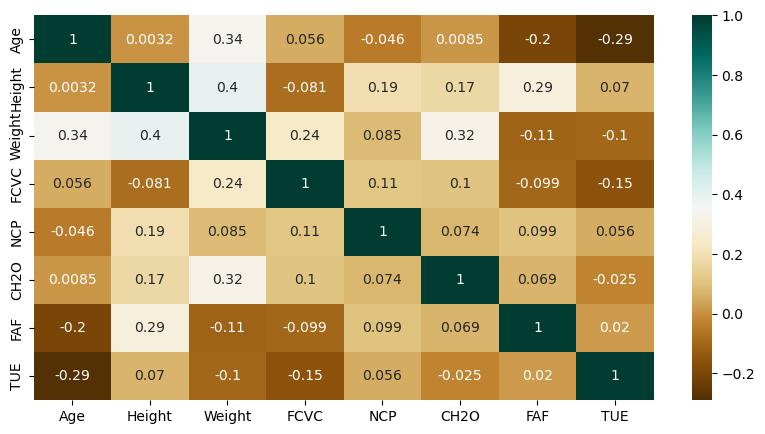

In [46]:
plt.figure(figsize=(10,5))
c= train.select_dtypes(include=('float64', 'int64')).drop(columns='id').corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Note: 
Usually in the language of dimension reduction, we will eliminate some features having big enough correlation due to their possible dependency (multicolinearity) which is not ideal for a linear model that often requiring interdependency between variables

Multicollinearity increases the standard errors of the coefficients. Increased standard errors in turn means that the coefficients for some independent variables may be statistically insignificant when trying to estimate the parameter effects of predictor variables.

To ensure the model is properly specified and functioning correctly, there are tests that can be run for multicollinearity. The **variance inflation factor (VIF)** is one such measuring tool. Using variance inflation factors helps to identify the severity of any multicollinearity issues so that the model can be adjusted. Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables.

#### Calculating Variance Inflation Factor (VIF)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train_numeric = train.select_dtypes(include=('float64', 'int64'))

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(train_numeric.values, i) for i in range(train_numeric.shape[1])]

print(vif_data)

  feature        VIF
0      id   3.984528
1     Age  21.489479
2  Height  74.701217
3  Weight  16.335268
4    FCVC  22.220306
5     NCP  16.674125
6    CH2O  13.719120
7     FAF   2.700893
8     TUE   2.318272


In general terms,

VIF equal to 1 = variables are not correlated

VIF between 1 and 5 = variables are moderately correlated  

VIF greater than 5 = variables are highly correlated 

Despite some variable has quite large VIF like Height and Age for example. For now we will not eliminate them as we will work with linear model and implement regularization later, for it is quite good in handling multicolonearity

#### Scatterplot

Let's try each of categorical columns combination into play!

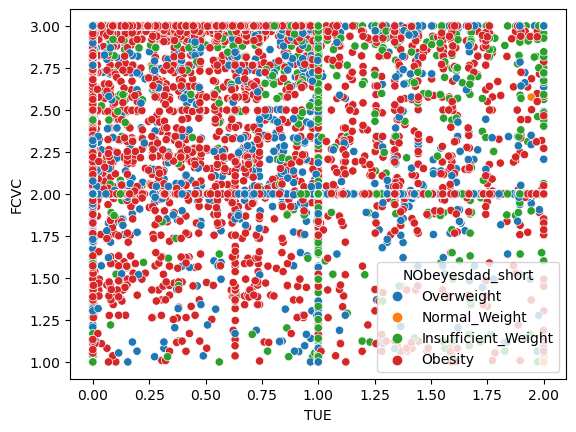

In [28]:
sns.scatterplot(data=train, x='TUE', y='FCVC', hue='NObeyesdad_short')
plt.show()

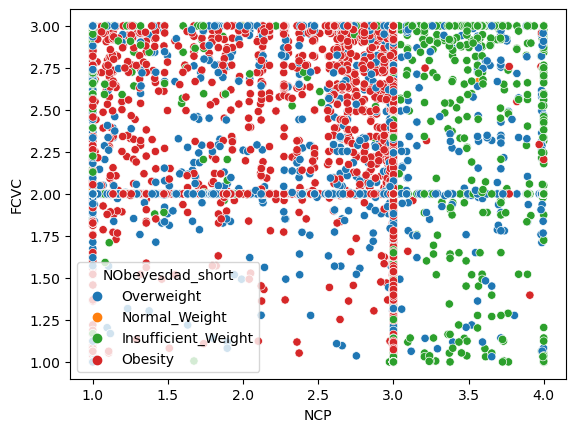

In [29]:
sns.scatterplot(data=train, x='NCP', y='FCVC', hue='NObeyesdad_short')
plt.show()

Note: greater NCP (more than 3) usually associated with insufficient weight and it only.
However some other numerical features dont have any meaningful relatioship in defining target

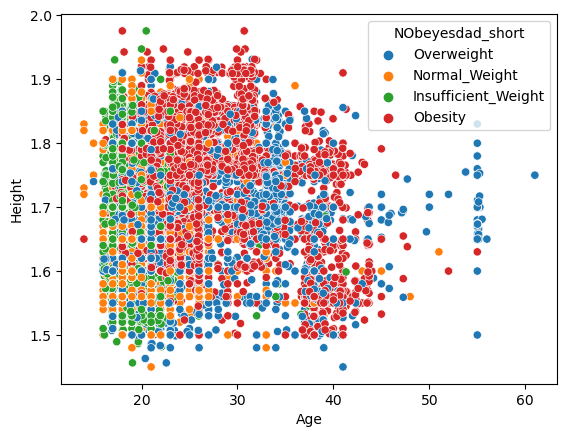

In [30]:
sns.scatterplot(data=train, x='Age', y='Height', hue='NObeyesdad_short')
plt.show()

The insufficient weight group are commonly amongst youngster.

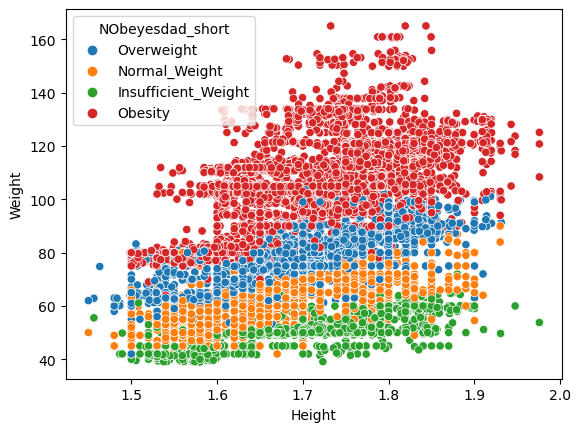

In [31]:
sns.scatterplot(data=train, x='Height', y='Weight', hue='NObeyesdad_short')
plt.show()

Insight: So far, only weight among other numerical feature being proper determinant of obesity (it is also intuitive). Age also seems defines the insufficient weight among youngster. NCP also (but seems strange)

### Working on the Categorical Data

#### Categorical Plot

We use some count plot and grouped bar chart to assess the frequency of certain values of a categorical column appear correspond to its target variable value.

We will assess 'family_history_with_overweight', since it is the most intuitive we find

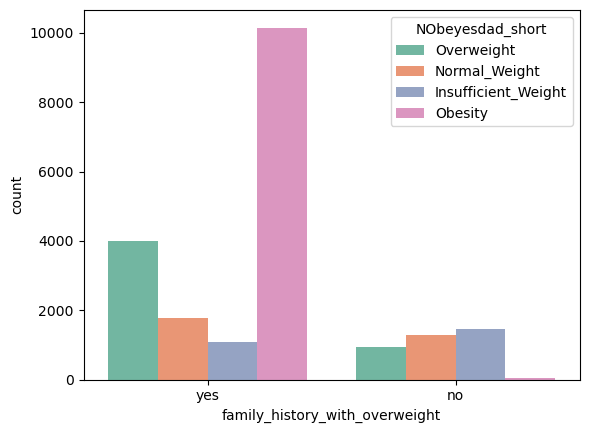

In [32]:
sns.countplot(data=train, x='family_history_with_overweight', hue='NObeyesdad_short', palette='Set2')
plt.show()


How about place it in a stacked chart

In [33]:
crosstab =  pd.crosstab(train['family_history_with_overweight'], train['NObeyesdad_short'])
crosstab

NObeyesdad_short,Insufficient_Weight,Normal_Weight,Obesity,Overweight
family_history_with_overweight,,,,
no,1449,1292,54,949
yes,1074,1790,10150,4000


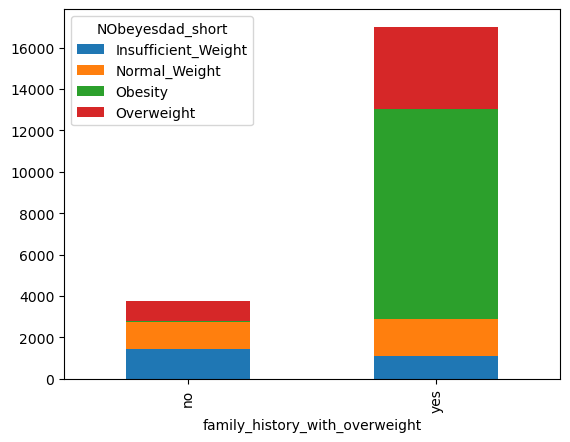

In [34]:
crosstab.plot(kind='bar', stacked=True)

plt.show()

**Major Finding**: Obesity is threatening people with family with overweight history

So far, it is weight and family_with_history being crucial feature

Let's work on remaining categorical features

In [37]:
train.select_dtypes(include=('object', 'category')).columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'NObeyesdad_short'],
      dtype='object')

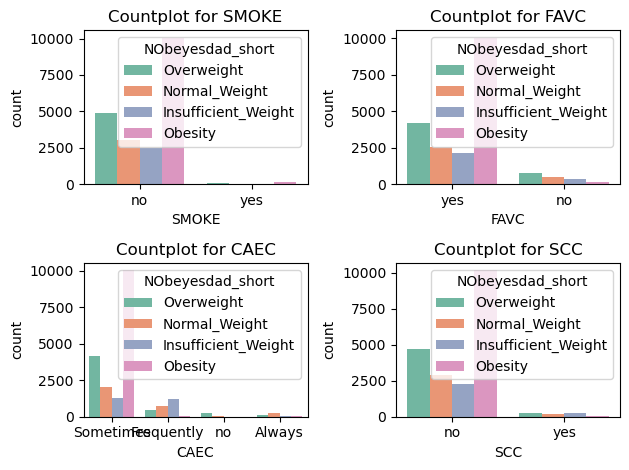

In [38]:
# Assuming 'train' is your DataFrame and it has columns 'A', 'B', 'C', 'SMOKE'

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2
                        # , figsize=(14, 10)
                        )  # Adjust the figure size as needed

# Plot 1: 'SMOKE'
sns.countplot(data=train, x='SMOKE', hue='NObeyesdad_short', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Countplot for SMOKE')

# Plot 2: 'A'
sns.countplot(data=train, x='FAVC', hue='NObeyesdad_short', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Countplot for FAVC')

# Plot 3: 'B'
sns.countplot(data=train, x='CAEC', hue='NObeyesdad_short', palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Countplot for CAEC')

# Plot 4: 'C'
sns.countplot(data=train, x='SCC', hue='NObeyesdad_short', palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('Countplot for SCC')

# Adjust layout
plt.tight_layout()
plt.show()


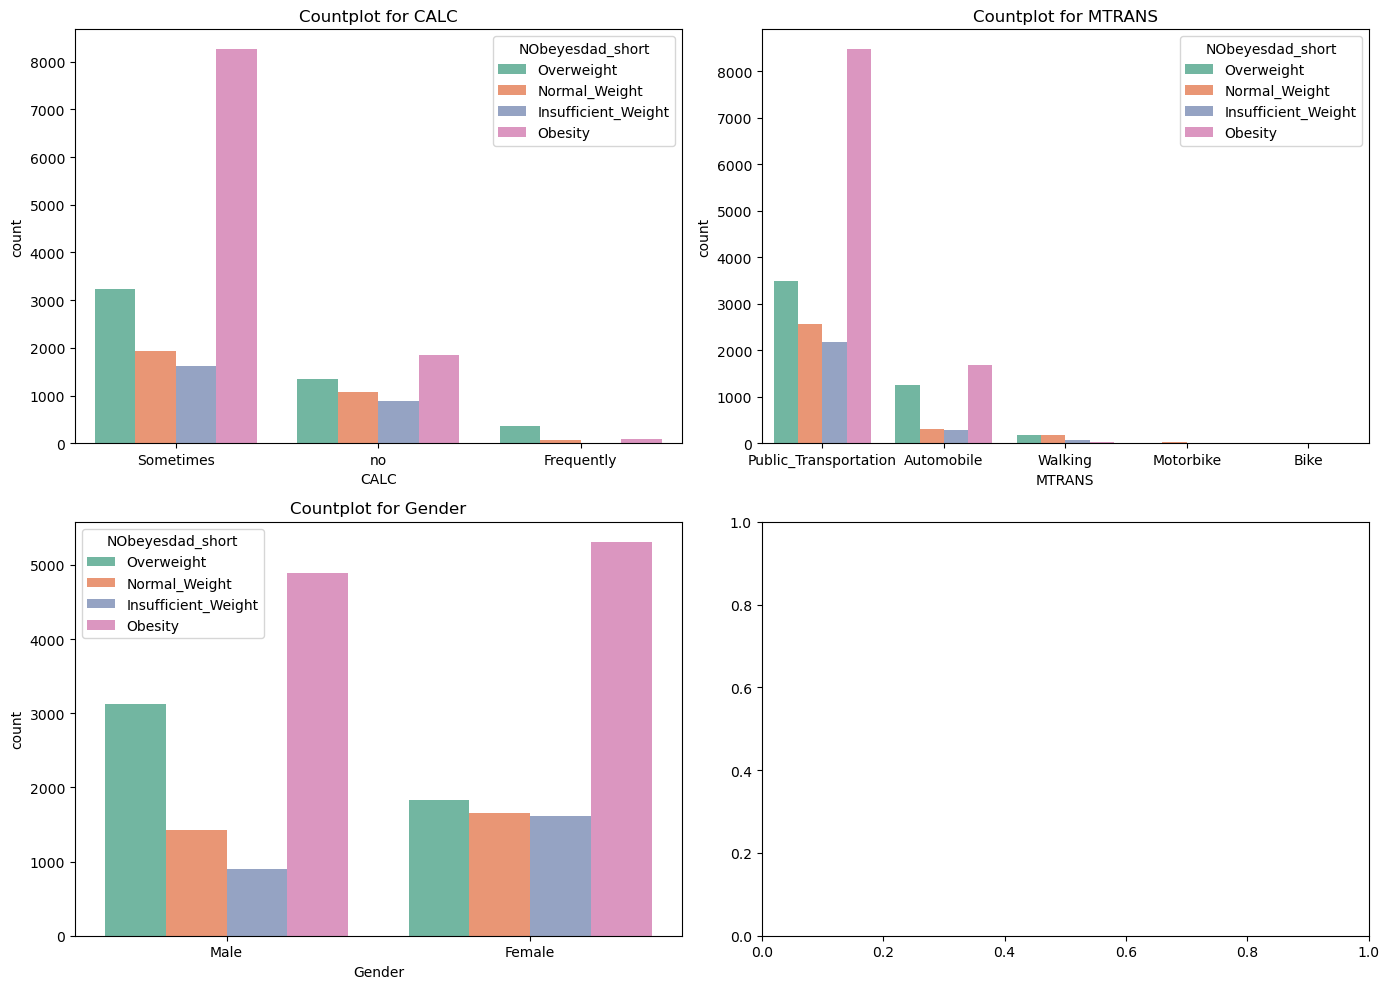

In [39]:
# Assuming 'train' is your DataFrame and it has columns 'A', 'B', 'C', 'SMOKE'

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2
                        , figsize=(14, 10)
                        )  # Adjust the figure size as needed

# Plot 1: 'SMOKE'
sns.countplot(data=train, x='CALC', hue='NObeyesdad_short', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Countplot for CALC')

# Plot 2: 'A'
sns.countplot(data=train, x='MTRANS', hue='NObeyesdad_short', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Countplot for MTRANS')

# Plot 3: 'B'
sns.countplot(data=train, x='Gender', hue='NObeyesdad_short', palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Countplot for Gender')


# Adjust layout
plt.tight_layout()
plt.show()


#### Hypothesis Testing (as a part of EDA)

As we reckon family history is quite a defining feature for the target, we will perform chi square test of independence to prove if the twos are indeed not independent

In [40]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(train['family_history_with_overweight'], train['NObeyesdad_short'])
contingency_table

NObeyesdad_short,Insufficient_Weight,Normal_Weight,Obesity,Overweight
family_history_with_overweight,,,,
no,1449,1292,54,949
yes,1074,1790,10150,4000


In [41]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

# chi2: The test statistic
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table

In [42]:
print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Check the p-value to determine the result of the test
alpha = 0.05  # Example significance level
if p < alpha:
    print(f"Since the p-value ({p}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("This suggests that there is a significant association between 'family_history_with_overweight' and 'NObeyesdad_short'.")
else:
    print(f"Since the p-value ({p}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("This suggests that there is no significant association between 'family_history_with_overweight' and 'NObeyesdad_short' and they are independent.")

Chi-Square Test Statistic: 5957.940984703342
P-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
 [[ 455.05886887  555.88245496 1840.43626554  892.62241064]
 [2067.94113113 2526.11754504 8363.56373446 4056.37758936]]
Since the p-value (0.0) is less than the significance level (0.05), we reject the null hypothesis.
This suggests that there is a significant association between 'family_history_with_overweight' and 'NObeyesdad_short'.


**This finding suggest that this particular feature might be quite important in explaning the target variable**

Note: We could perform similar test on other features if you want, but we will moving forward this time.

**Note prior proceeding**:

Since this is almost a baseline model. We decide not to treat further the imbalance categorical features (for example, we won't do oversampling or undersampling).




## Feature Selection (Based on EDA Findings)

Yes, we are dropping some columns. 

The dropping of numerical columns is motivated by the assumption of problem being linear, so we banish features that signify almost no relationship to the target variable based on the scatter plot.

For Categorical features, We will diminish most of them we denote having too imbalance class

In [27]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'NObeyesdad_short'],
      dtype='object')

In [95]:
train_drop = train[[
    'Gender', 'Age', 'Height', 'Weight'
    , 'family_history_with_overweight'
    # , 'FAVC'
    # , 'FCVC'
    , 'NCP'
    # , 'CAEC',
    #    'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'
       , 'NObeyesdad'
    #    ,'NObeyesdad_short'

]]

In [96]:
test_drop = test[[
    'Gender', 'Age', 'Height', 'Weight'
    , 'family_history_with_overweight'
    # , 'FAVC'
    # , 'FCVC'
    , 'NCP'
    # , 'CAEC',
    #    'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'

]]

**Disclaimer**. We might perform the most intuitive, less in-depth feature selection let alone feature engineering this time

## Data Preprocessing

First, check if the features of numerical are normal

### Data Normality Assessment
#### Histogram

C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\4096405733.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train_drop, x='Age', palette='Set2', ax=axs[0, 0])
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\4096405733.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train_drop, x='Weight', palette='Set2', ax=axs[0, 1])
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Zak\AppData\Local\Temp\ipykernel_

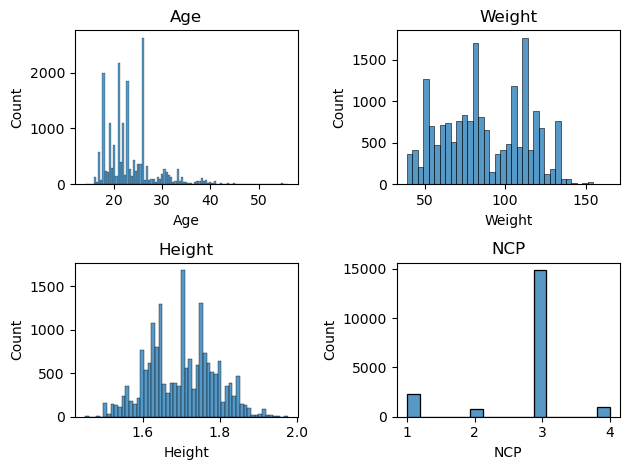

In [97]:
# Assuming 'train' is your DataFrame and it has columns 'A', 'B', 'C', 'SMOKE'

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2
                        # , figsize=(14, 10)
                        )  # Adjust the figure size as needed

# Plot 1: 'SMOKE'
sns.histplot(data=train_drop, x='Age', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Age')

# Plot 2: 'A'
sns.histplot(data=train_drop, x='Weight', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Weight')

# Plot 3: 'B'
sns.histplot(data=train_drop, x='Height', palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Height')

sns.histplot(data=train_drop, x='NCP', palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('NCP')



# Adjust layout
plt.tight_layout()
plt.show()


#### Q-Q Plot

Histogram may not enough, do another visual method of Q-Q Plot

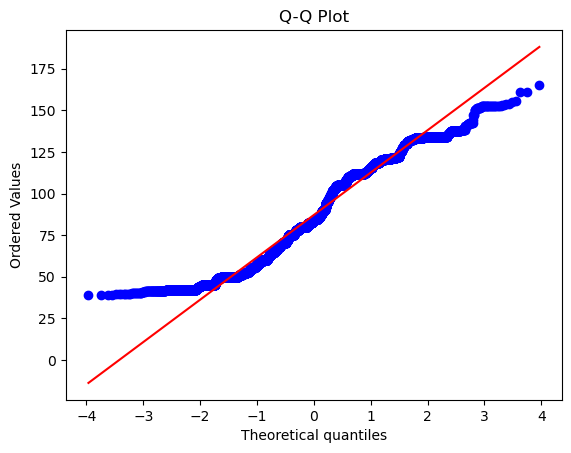

In [98]:
from scipy import stats

stats.probplot(train_drop['Weight'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

#### Normality Test: Shapiro-Wilk & Dagostino

Does not seem normal to me. We move on doing Shapiro-Wilk Test, as well Dagostino

In [99]:
shapiro_test = stats.shapiro(train_drop['Age'])
print(shapiro_test[1])

dagostino_test = stats.normaltest(train_drop['Age'])
print(dagostino_test[1])

0.0
0.0


c:\Users\Zak\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Log Normalization

We can proceed into **Log Normalization** since we confirm there is abnormality, particularly in age column.

Having said that, we perform log normalization to all numerical columns, so to set them all having similar scale.

In [100]:
train_drop['Age_log'] = np.log(train_drop['Age'])
train_drop['Weight_log'] = np.log(train_drop['Weight'])
train_drop['Height_log'] = np.log(train_drop['Height'])

train_drop = train_drop.drop(columns=['Age','Weight','Height'])
train_drop.head()


C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\1319293114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_drop['Age_log'] = np.log(train_drop['Age'])
C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\1319293114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_drop['Weight_log'] = np.log(train_drop['Weight'])
C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\1319293114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Gender,family_history_with_overweight,NCP,NObeyesdad,Age_log,Weight_log,Height_log
1,Female,yes,3.0,Normal_Weight,2.890372,4.043051,0.444686
2,Female,yes,1.0,Insufficient_Weight,2.890372,3.915333,0.537347
4,Male,yes,2.0,Overweight_Level_II,3.454456,4.541144,0.649292
5,Male,yes,3.0,Insufficient_Weight,2.897471,3.942603,0.558772
6,Male,yes,3.0,Obesity_Type_II,3.397290,4.724951,0.562304


In [101]:
#apply it to test data as well

test_drop['Age_log'] = np.log(test_drop['Age'])
test_drop['Weight_log'] = np.log(test_drop['Weight'])
test_drop['Height_log'] = np.log(test_drop['Height'])

test_drop = test_drop.drop(columns=['Age','Weight','Height'])
test_drop.head()


C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\1968906684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop['Age_log'] = np.log(test_drop['Age'])
C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\1968906684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_drop['Weight_log'] = np.log(test_drop['Weight'])
C:\Users\Zak\AppData\Local\Temp\ipykernel_10804\1968906684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Gender,family_history_with_overweight,NCP,Age_log,Weight_log,Height_log
0,Male,yes,3.0,3.292122,4.792846,0.614263
1,Female,yes,1.0,3.044522,4.189655,0.470004
2,Female,yes,3.0,3.258097,4.714926,0.496740
3,Male,yes,3.0,3.043534,4.641204,0.440270
4,Female,yes,3.0,3.258097,4.652391,0.486981


Do it needs **Feature Scaling**? Standardization maybe?

In [102]:
train_drop.describe()

,NCP,Age_log,Weight_log,Height_log
count,18933.000000,18933.000000,18933.000000,18933.000000
mean,2.767654,3.136536,4.419929,0.529206
std,0.724482,0.204132,0.316050,0.051086
min,1.000000,2.639057,3.666169,0.371564
25%,3.000000,2.993041,4.180888,0.489529
50%,3.000000,3.121481,4.423817,0.530628
75%,3.000000,3.258097,4.709575,0.565331
max,4.000000,4.025352,5.106292,0.680904


the coefficient of variation (std divided by mean) seems okay (before log normalization, and even more after log normalization), hence feature scaling like Standardization may not needed

### Encoding the categorical variable

In [103]:
train_drop_X = train_drop.drop(columns='NObeyesdad')
train_drop_y = train_drop[['NObeyesdad']]

train_drop_X = pd.get_dummies(train_drop_X)
train_drop_X.head()

,NCP,Age_log,Weight_log,Height_log,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes
1,3.0,2.890372,4.043051,0.444686,True,False,False,True
2,1.0,2.890372,3.915333,0.537347,True,False,False,True
4,2.0,3.454456,4.541144,0.649292,False,True,False,True
5,3.0,2.897471,3.942603,0.558772,False,True,False,True
6,3.0,3.397290,4.724951,0.562304,False,True,False,True


In [104]:
# do for the test set as well

test_drop_X = pd.get_dummies(test_drop)
test_drop_X.head()

,NCP,Age_log,Weight_log,Height_log,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes
0,3.0,3.292122,4.792846,0.614263,False,True,False,True
1,1.0,3.044522,4.189655,0.470004,True,False,False,True
2,3.0,3.258097,4.714926,0.496740,True,False,False,True
3,3.0,3.043534,4.641204,0.440270,False,True,False,True
4,3.0,3.258097,4.652391,0.486981,True,False,False,True


## Develop the Classification Model

### Multinomial Logistic Regression, and Hyperparameter Tuning using GridSearchCV

Linear Model will be our first choice since it shows a linearity for Age and Weight.

We will also perform gridsearch with cross-validation to find the best parameter of the logistic regression on accuracy score of the training dataset

In [105]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')

# Define the grid of parameters to search

param_grid = [
    {'penalty': ['l2'], 'C': [1, 10, 100], 'solver': ['newton-cg', 'saga', 'lbfgs']},  # 'l2' with solvers that support it
    {'penalty': ['l1'], 'C': [1, 10, 100], 'solver': ['saga', ]}  # 'l1' only with 'saga' and 'liblinear'
]
    
    # solvers that are support multiclass, for it can handle multinomial loss


# Configure Stratified K-Fold cross-validation, to ensure class balance on target variable
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy')


In [106]:
# We won't be running this anymore since it take 20 mins per run, but if you need to try, please uncomment code below

# grid_search.fit(train_drop_X,train_drop_y.values.ravel())

In [107]:
# We comment this one as it has something to do in showing result of grid_search

# # Best parameters
# print("Best parameters:", grid_search.best_params_)

# # Best score
# print("Best cross-validation score:", grid_search.best_score_)


### The Optimal Model: Based on the Search

Here is the result of GridSearch, we will save it so we will not run it again for it just too long next time:

<code> Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

Best cross-validation score: 0.8464691517562682 </code>

Note: We might as well opt for **Randomized Search CV** next time if we have so big of a search size

Now, train the model and predict using the test data, using the optimal parameter of logistic regression we have found from previous section 

In [108]:
optimal_model = LogisticRegression(C= 100, penalty= 'l2', solver = 'newton-cg', multi_class='multinomial', max_iter = 10000, random_state = 100)

optimal_model.fit(train_drop_X,train_drop_y.values.ravel())

y_pred = optimal_model.predict(test_drop_X)

See the Predict Probability (the probability each row being assigned to each class)

In [109]:
y_score = optimal_model.predict_proba(test_drop_X)

# Example: if you have a trained classifier
class_labels = optimal_model.classes_  # This retrieves the class labels used by the classifier

# Now create the DataFrame
predict_proba_df = pd.DataFrame(y_score, columns=class_labels)
predict_proba_df.head()

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,1.410372e-19,4.929054e-12,0.030585,9.671419e-01,2.190237e-03,1.516790e-07,8.313702e-05
1,2.985687e-05,1.034524e-01,0.004874,3.024940e-10,3.367655e-11,7.124806e-01,1.791636e-01
2,1.933878e-25,1.324181e-16,0.002650,1.356650e-03,9.959930e-01,7.483089e-11,2.005066e-07
3,1.626826e-21,7.825688e-13,0.323311,6.758369e-01,4.246415e-04,1.421990e-07,4.275235e-04
4,2.017838e-22,4.081555e-14,0.022080,2.072832e-03,9.758397e-01,6.644536e-09,7.213005e-06


## Exporting the Result

In [110]:
result = test

result['NObeyesdad'] = y_pred
result = result[['id','NObeyesdad']] 
result.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III


In [111]:
result.set_index('id', inplace=True)
print(result.head())
print(result.shape)

               NObeyesdad
id                       
20758     Obesity_Type_II
20759  Overweight_Level_I
20760    Obesity_Type_III
20761     Obesity_Type_II
20762    Obesity_Type_III
(13840, 1)


In [112]:
result.to_csv('submission_1.csv')

## Summary of the Notebook 

This notebook is the first attempt in doing model classification for this particular case.
Call it a baseline model if you may. We will try to improve the model in the later attempt.

Some review and suggestion of this attempt and for the next attempt might be:

+ Consider train test split to evaluate the model, since we do not perform evaluation at all in this attempt
+ Consider doing cross-validation as well and demonstrate it (in this attempt we have performed CV, however it is inexplicit since it is only part of GridSearch)
+ Consider comparison of multiple algorithm, perhaps adopt ensemble method, and also other proper algorithm especially for multi-class classification like SoftMax regression, One vs All, and One vs One Classification.
+ Might consider to actually drop some rows due to outlier (think about other robust outlier method)
+ Might include bias and variance analysis
+ If using bagging method, might see how the model perform in OOB Evaluation
+ Might implement boosting and the use of AdaBoost or XGBoost


### Kaggle Score

#### Default Model

The default notebook resulting in <code>84.393%</code> in public score, and <code>84.636%</code> in private score

#### Version 1
The version 1 implement the dropping of rows deemed outlier by LoF. 

Resulting in <code>84.393%</code> in public score, and <code>84.645%</code> in private score. Just slightly better